In [2]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('Data file.csv')

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


### Problem Statement:-

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
## Checking any null values
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# EDA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.shape

(209593, 36)

In [10]:
## Dropping irrelevant column mobile number.
df.drop('msisdn',axis=1,inplace=True)

In [11]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


<AxesSubplot:xlabel='pcircle', ylabel='count'>

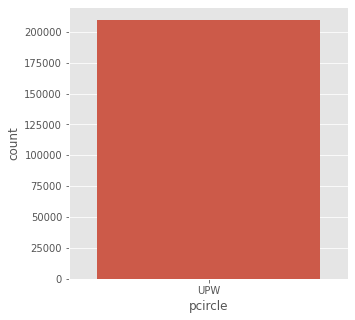

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(x='pcircle',data=df)

In [96]:
df['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

### Observation:-

p circle has only one value UPW means single circle so it is irrelevant.

Date column has has year 2016 so the required details is day and month

In [12]:
## Dropping p circle
df.drop('pcircle',axis=1,inplace=True)

In [13]:
df['pdate']=pd.to_datetime(df['pdate'])

In [14]:
df['day']=df['pdate'].dt.day
df['month']=df['pdate'].dt.month

In [15]:
df.drop('pdate',axis=1,inplace=True)

In [16]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


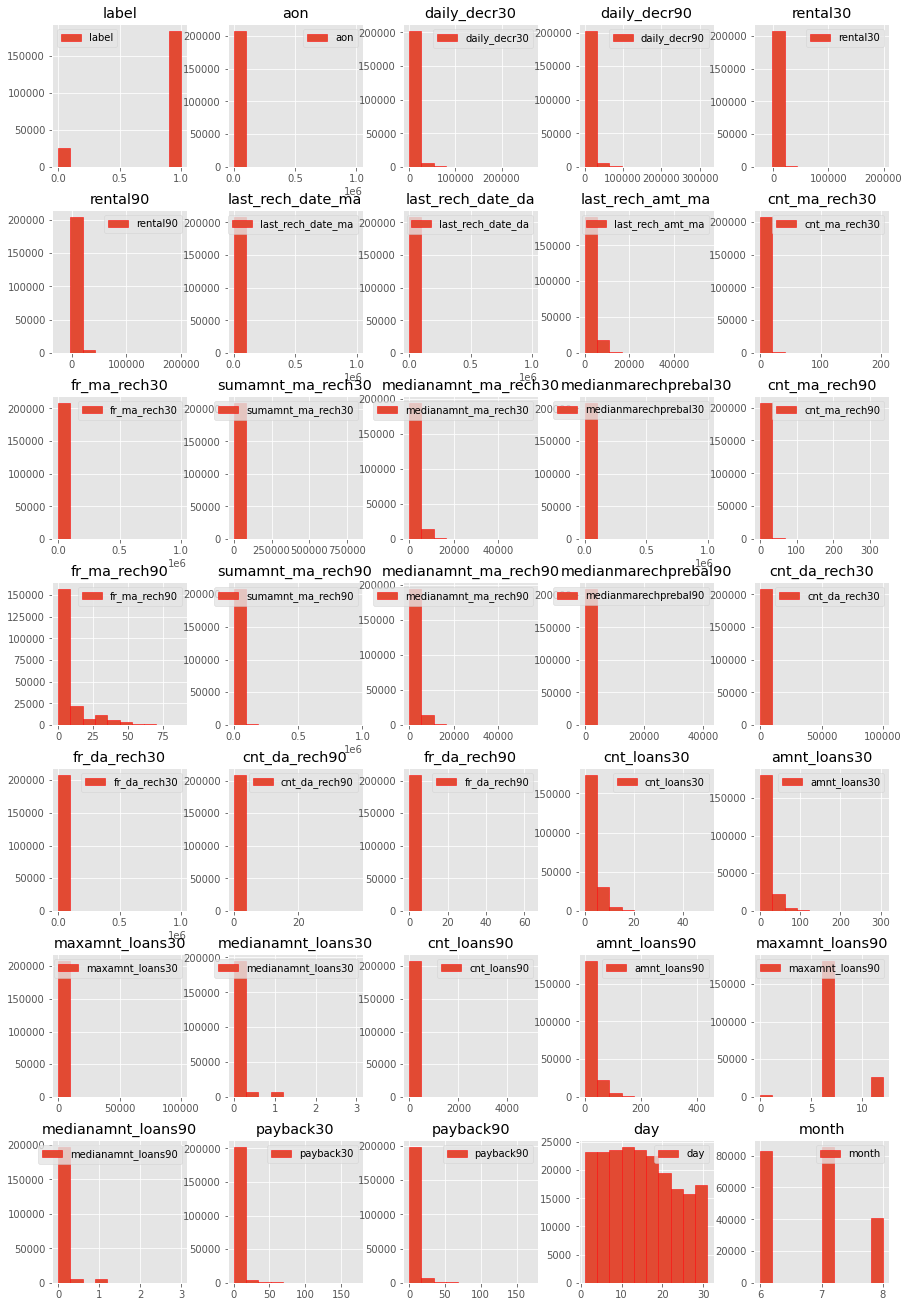

In [102]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,5),legend=True)
plt.show()

### Observation:-

Most of the features are unimodal

# Bivariate Analysis

In [103]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'day', 'month'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='aon'>

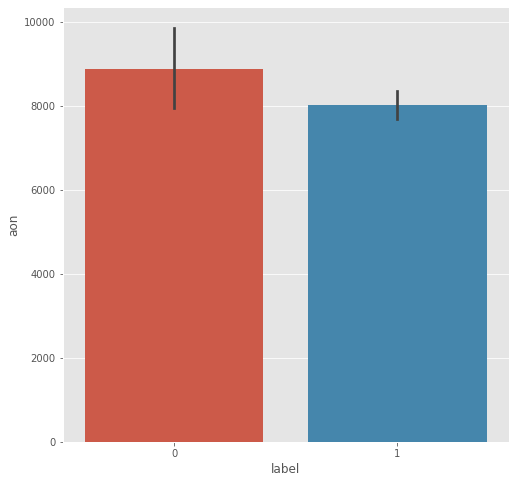

In [104]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
sns.barplot(x='label',y='aon',data=df)

### Observation:- 

As the age on cellular network inreases the mostly they have deflauted in paying the loan

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

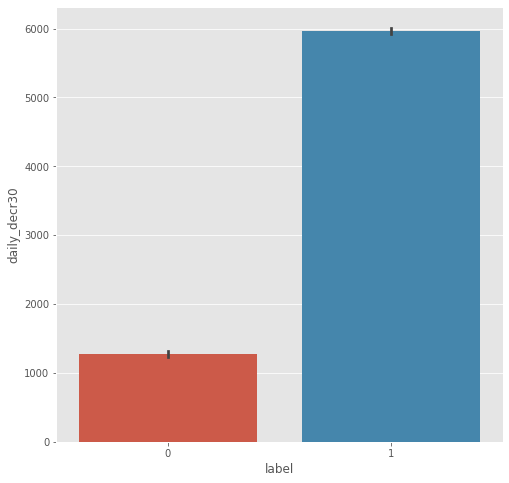

In [105]:
plt.figure(figsize=(8,8))
sns.barplot(x='label',y='daily_decr30',data=df)

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

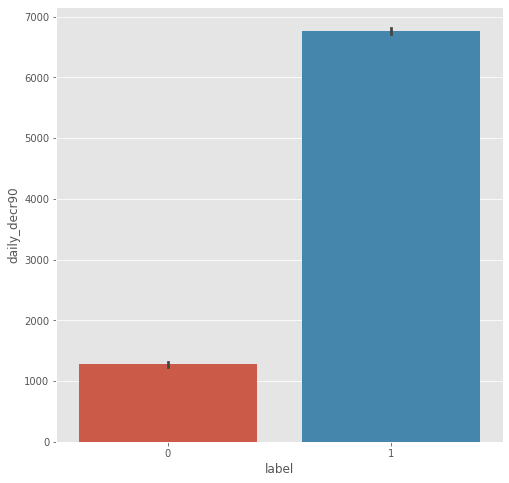

In [106]:
plt.figure(figsize=(8,8))
sns.barplot(x='label',y='daily_decr90',data=df)

### Observation:-

If the daily amount spend from main account in 30 days as well as 90 days having credit repayment success rate is high.

<AxesSubplot:xlabel='label', ylabel='rental90'>

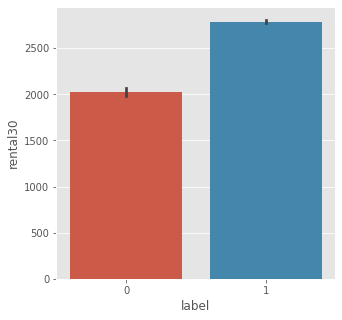

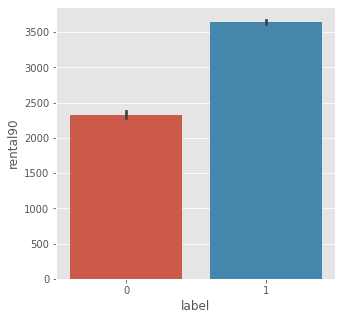

In [107]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='rental30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='rental90',data=df)



### Observation:-

If the average main balance in the account is more the success of repayement of loan is higher.

Similarly if the average account balance is low the customer fails to repay the loan



<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

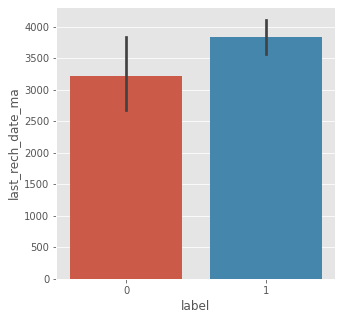

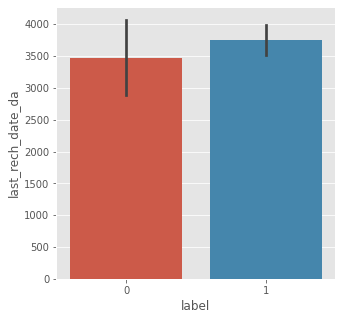

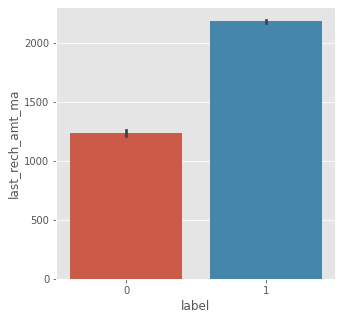

In [108]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='last_rech_date_ma',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='last_rech_date_da',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='last_rech_amt_ma',data=df)


### Observation:-

If the number of last recharge day increase the default rate increases

similarly the number of last recharge month increases the default rate increases.

if the number of times recharge done on main account increases the default rate decreases.



<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

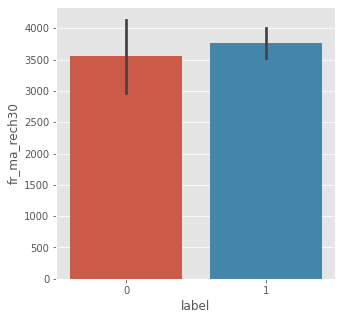

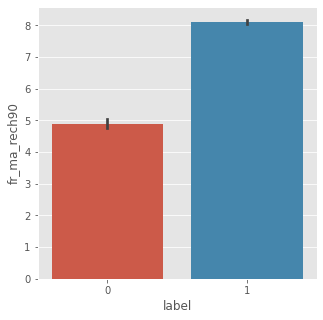

In [109]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='fr_ma_rech30',data=df)

plt.figure(figsize=(5,5))
sns.barplot(x='label',y='fr_ma_rech90',data=df)



### Observation:-
The frequency of recharge in 90 days increases the default rate of loan decreases.where as the frequency of recharge in 30 days does not show much rate of increase in loan repayment.

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech90'>

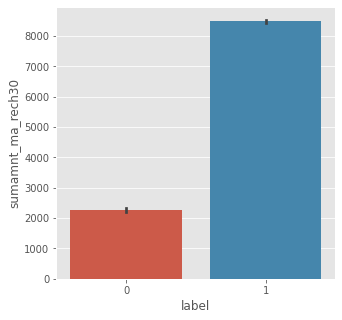

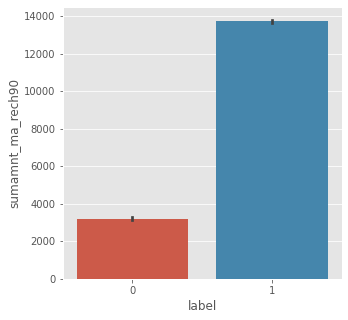

In [110]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='sumamnt_ma_rech30',data=df)

plt.figure(figsize=(5,5))
sns.barplot(x='label',y='sumamnt_ma_rech90',data=df)



### Observation:- 

If total amount of recharge in 30 days increases the rate of default of loan decreases.
Similarly the rate of recharge in 90 days inreases the rate of default of loan decreases.

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech90'>

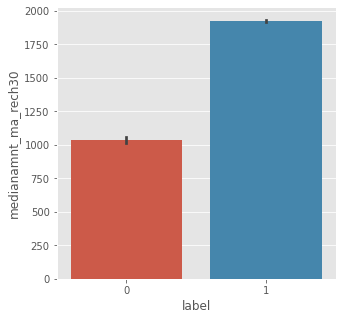

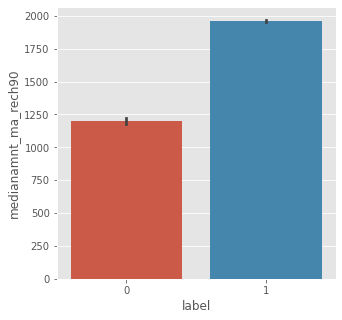

In [111]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianamnt_ma_rech30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianamnt_ma_rech90',data=df)



### Observation:-

If the median amount of recharge in main account in 30 days increases then the default rate decreases.

whereas the median amount of recharge in main account in 90 days increases does not shows the same result.

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

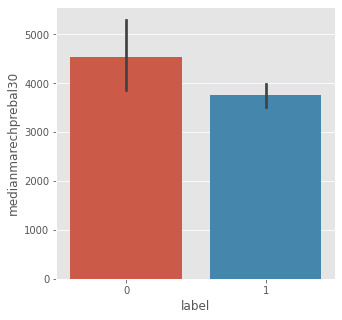

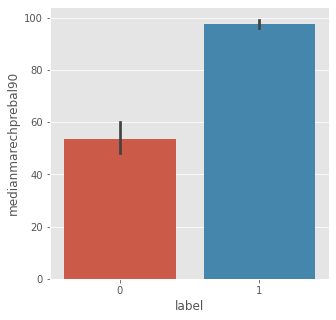

In [112]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianmarechprebal30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianmarechprebal90',data=df)



### Observation:-

If the median amount just before recharge in main account in 30 days decreases the loan default rate increases.

If the median amount just before recharge in main account in 90 days increases the loan default rate decreases.

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

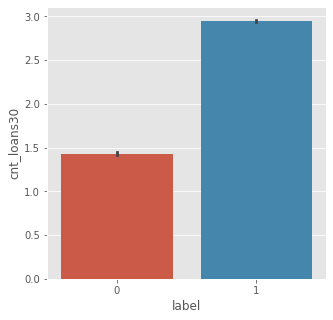

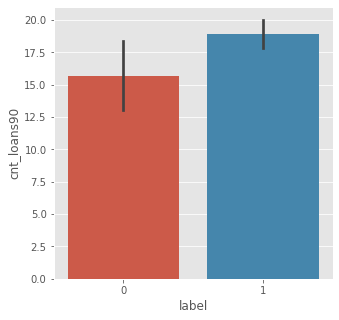

In [113]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='cnt_loans30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='cnt_loans90',data=df)


### Observation:-

If the loan amount increases in does 30 days the default rate decreases 

Whereas if loan amount inceases in 90 days the default rate increases.

<AxesSubplot:xlabel='label', ylabel='amnt_loans90'>

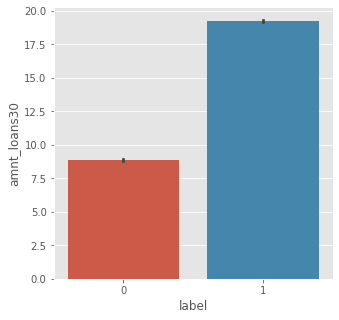

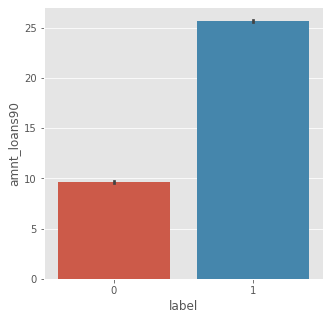

In [114]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='amnt_loans30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='amnt_loans90',data=df)



### Observation:-

If the total amount taken by user in 30 days as well as 90 days increases the rate of default decreases.

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans90'>

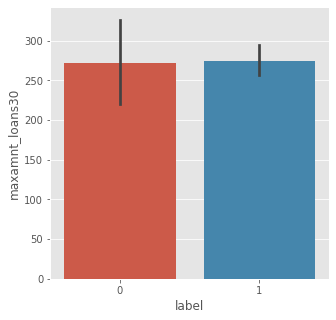

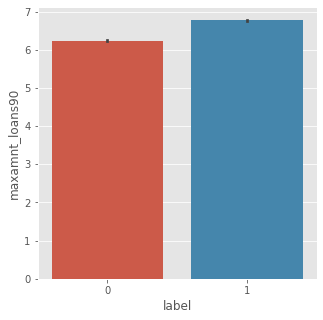

In [115]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='maxamnt_loans30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='maxamnt_loans90',data=df)



### Observation:-

If the maximum amount of loan taken by user increase in 30 as well as 90 days increases the rate of loan defalut increases

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans90'>

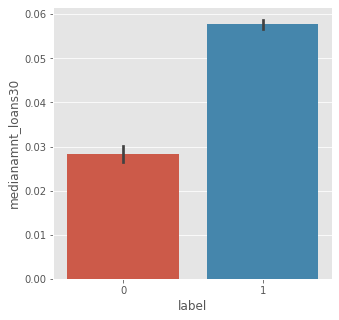

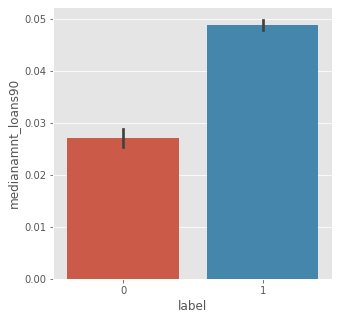

In [116]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianamnt_loans30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='medianamnt_loans90',data=df)



### Observation:-

If the median amount of loan taken in 30 days increase the default rate decreases.

Whereas the median amount of loan taken in 90 days increase the default rate is higher than 30 days

<AxesSubplot:xlabel='label', ylabel='payback90'>

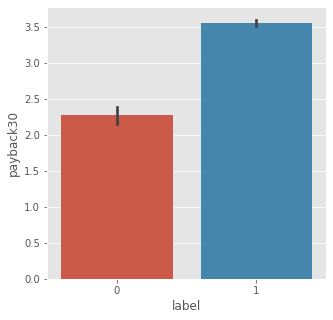

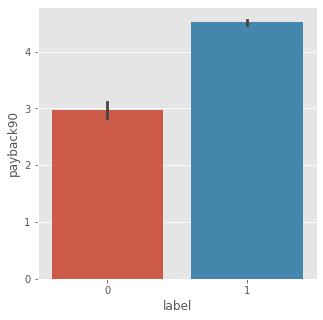

In [117]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='payback30',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='payback90',data=df)



### Observation:-

If the average time taken to repay the loan in 30 days increase the default rate decreases.

Whereas the average time taken ito repay the loan in 90 days then the default rate increases.

<AxesSubplot:xlabel='label', ylabel='month'>

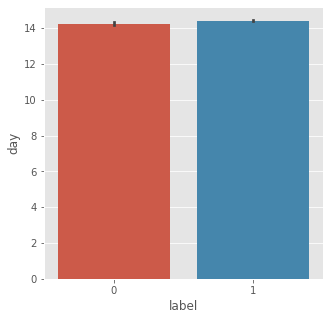

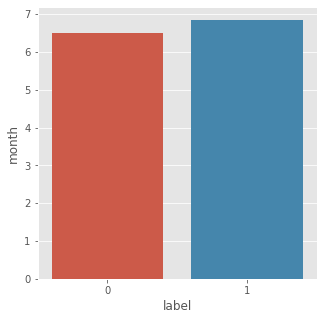

In [118]:
plt.figure(figsize=(5,5))
sns.barplot(x='label',y='day',data=df)


plt.figure(figsize=(5,5))
sns.barplot(x='label',y='month',data=df)



### Observation:- 

As the number of days and month increases the default rate increases

In [16]:
df.nunique().to_frame()

,0
label,2
aon,4507
daily_decr30,147025
daily_decr90,158669
rental30,132148
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174
last_rech_amt_ma,70
cnt_ma_rech30,71


<AxesSubplot:>

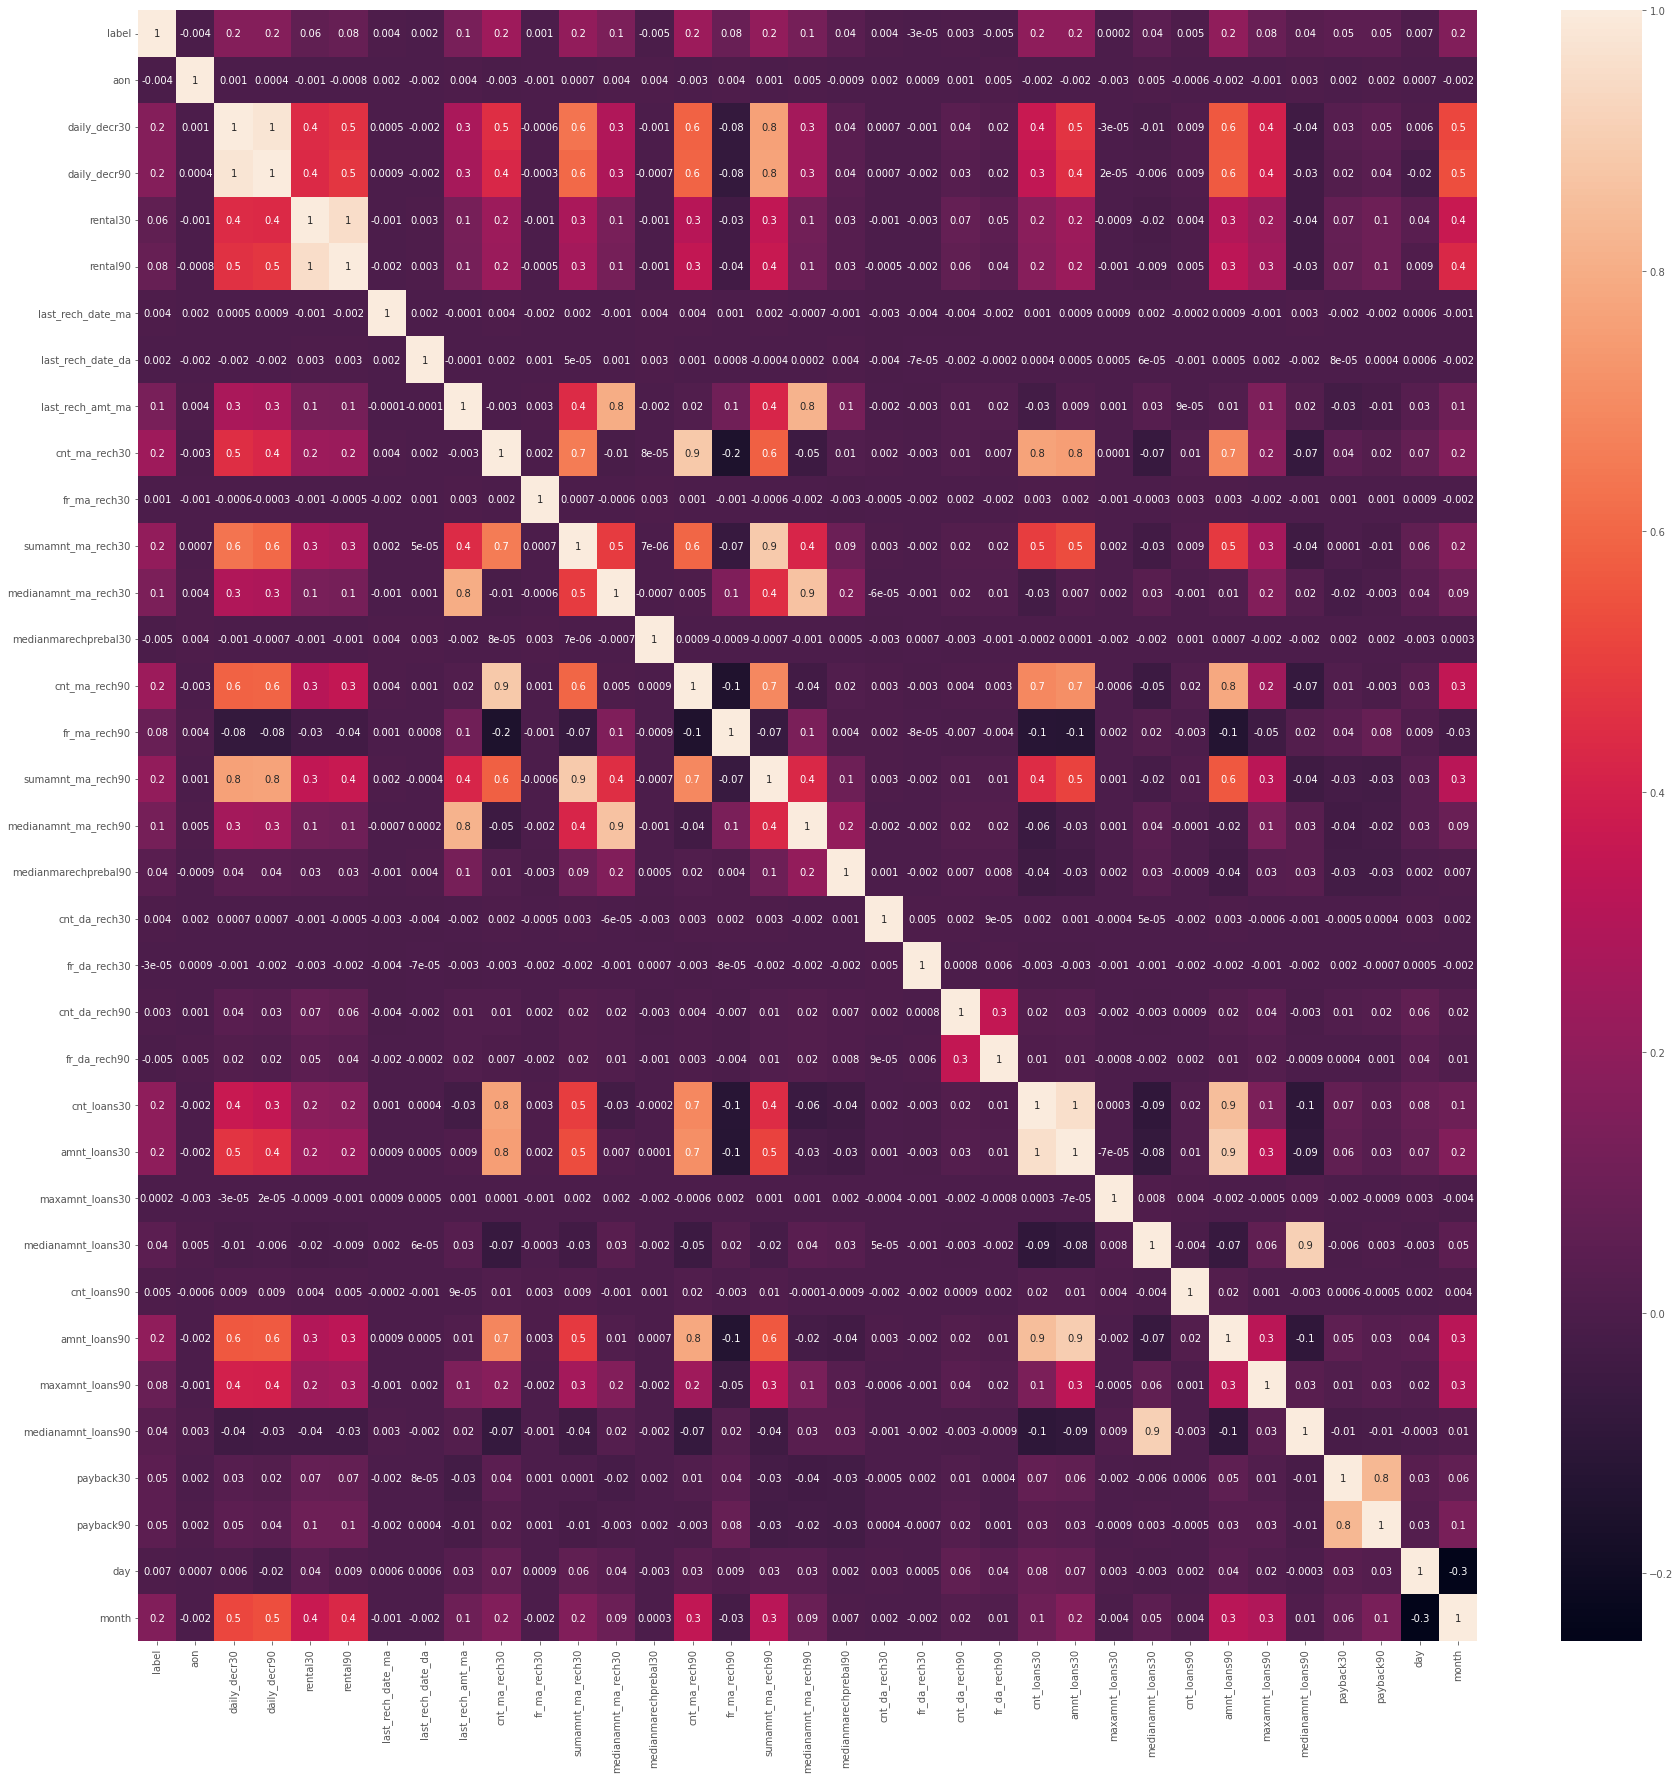

In [120]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


### Observation:- Since lots of columns has multicollinearity problem we will treat through vif

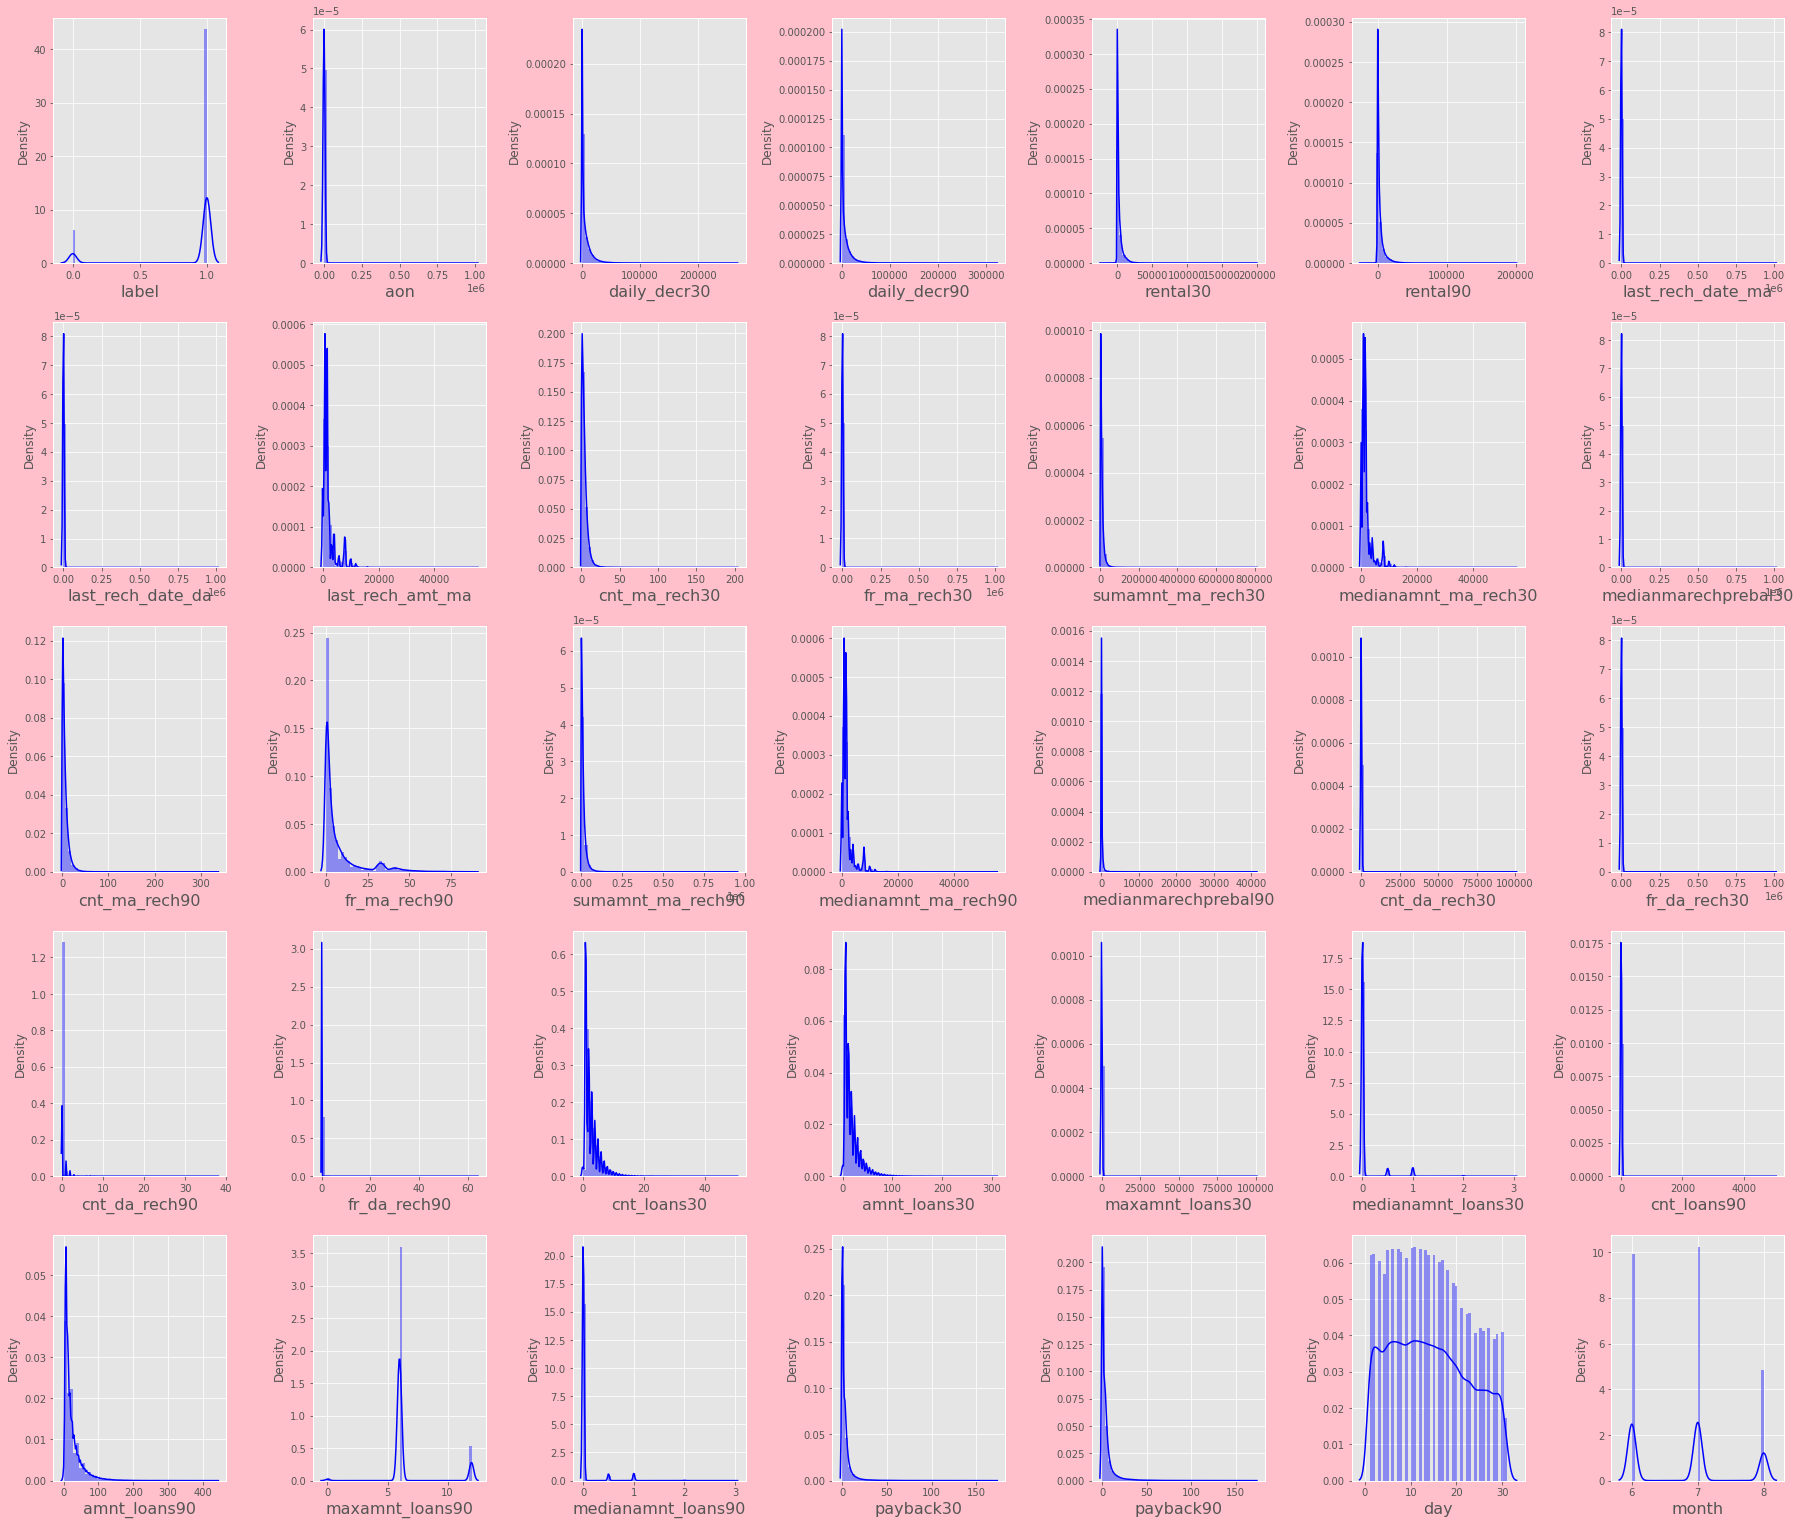

In [121]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 37:
        ax=plt.subplot(6,7,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


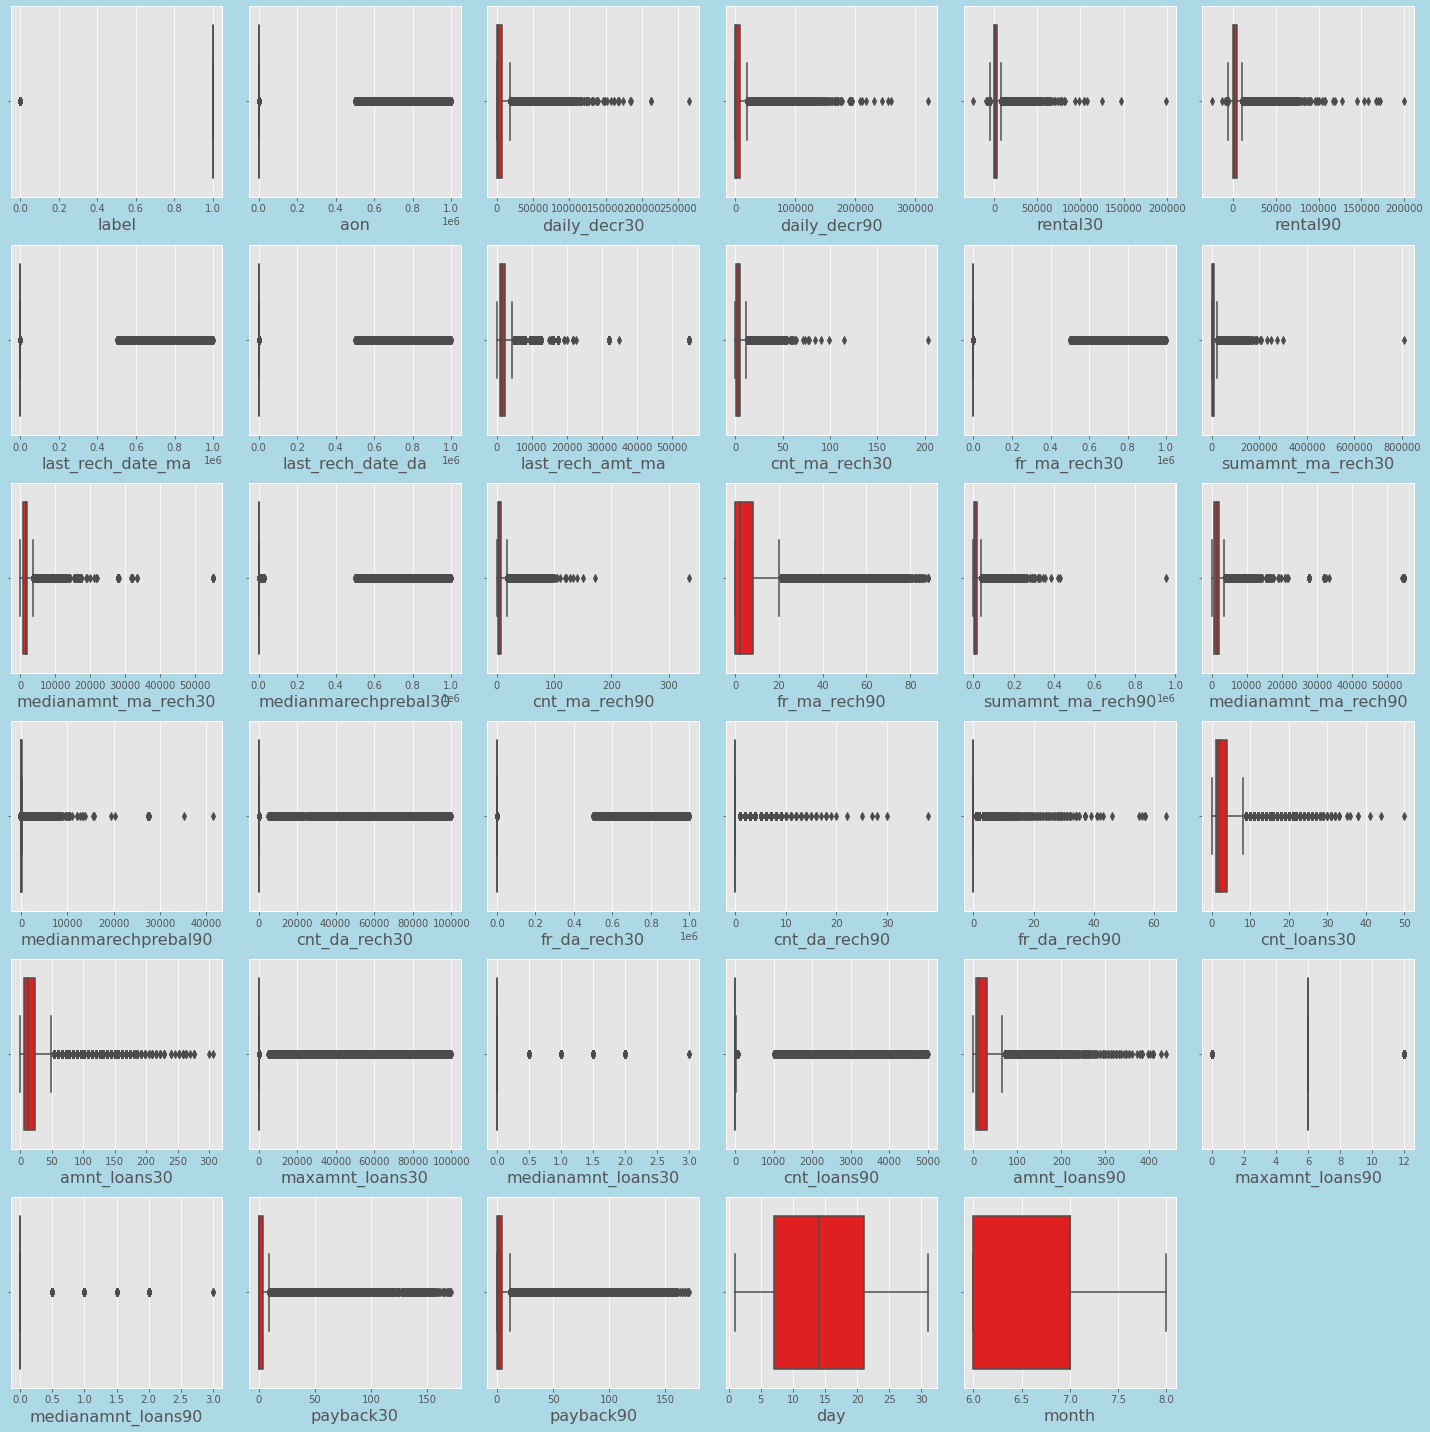

In [122]:
plt.figure(figsize=(20,20),facecolor='lightblue')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:-

Since lots of outliers are there in columns so we can treat through zscore

In [17]:
from scipy.stats import zscore
df.shape

(209593, 35)

In [18]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [19]:
df.shape

(163017, 35)

In [20]:
data_loss=209593-163017
print(data_loss)

46576


In [21]:
print('Loss_percent',(46576/209593)*100)

Loss_percent 22.222116196628704


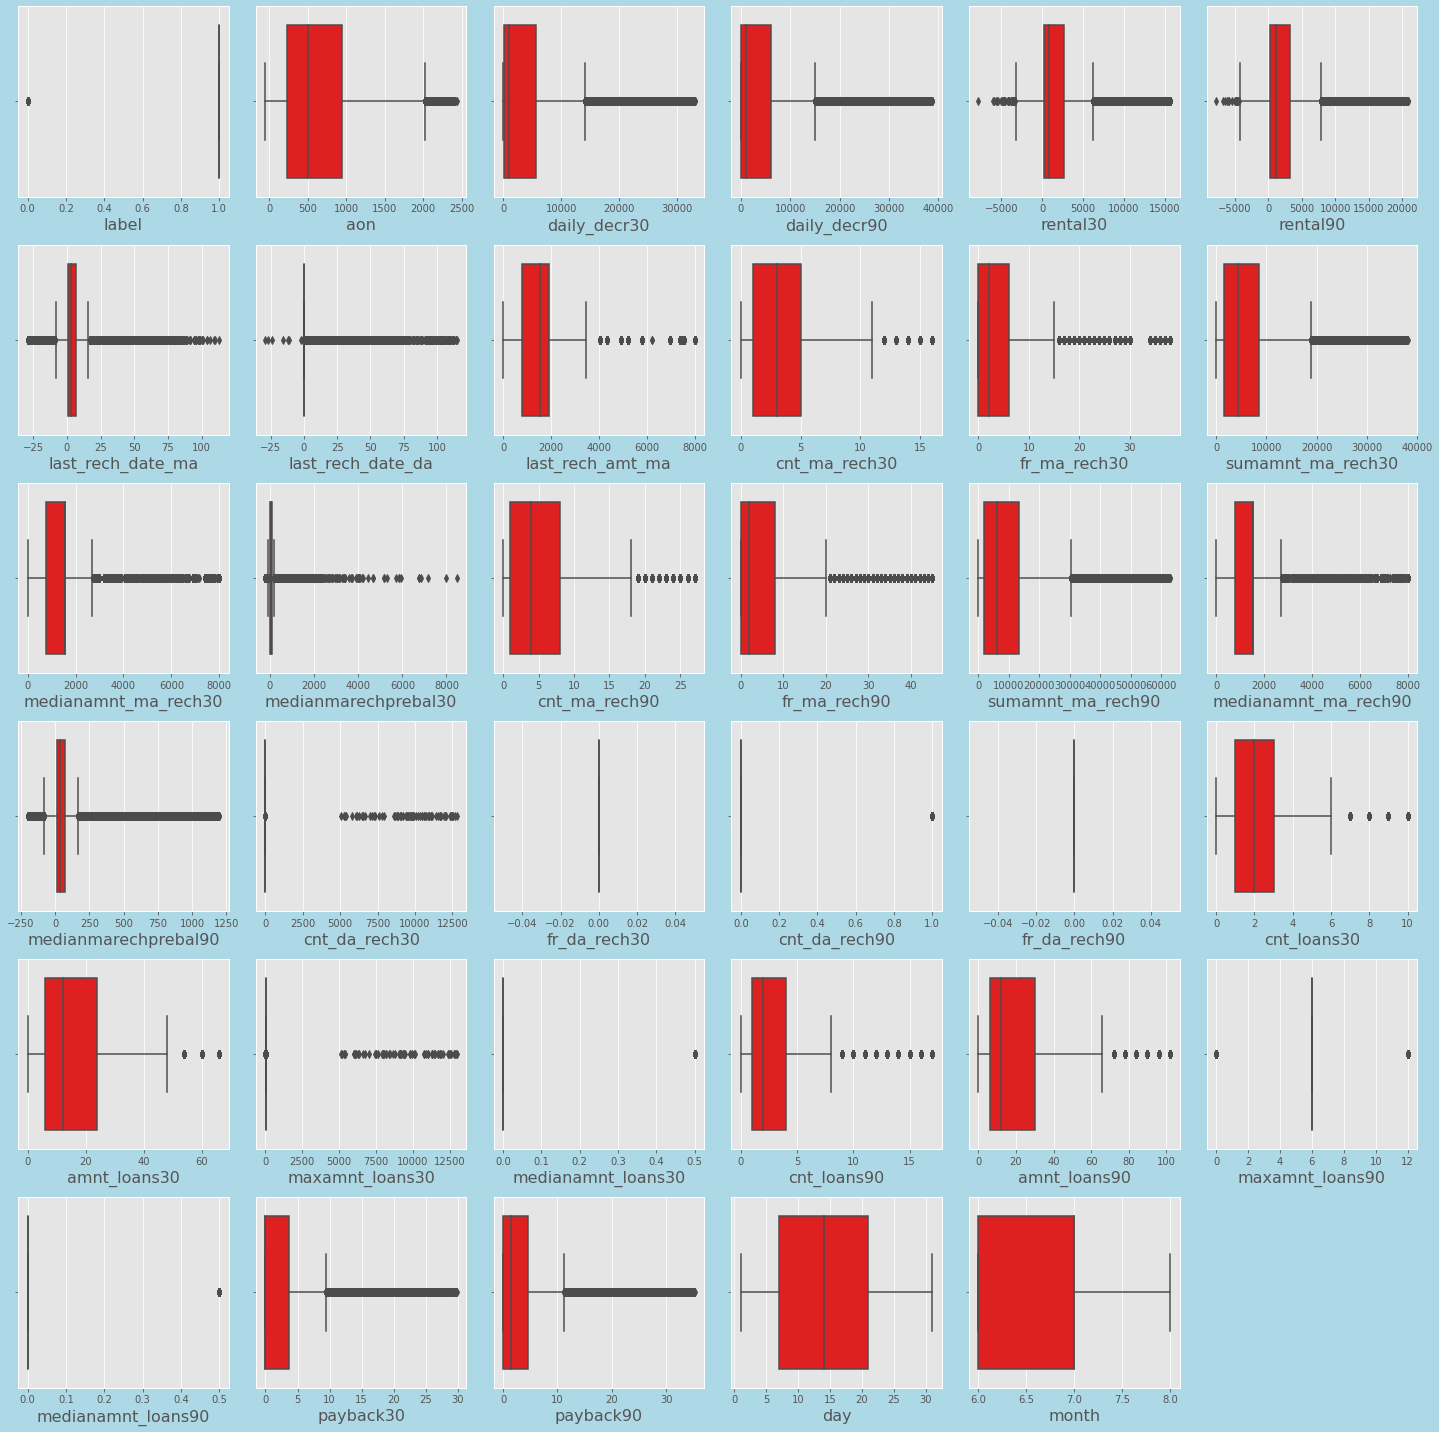

In [128]:
plt.figure(figsize=(20,20),facecolor='lightblue')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


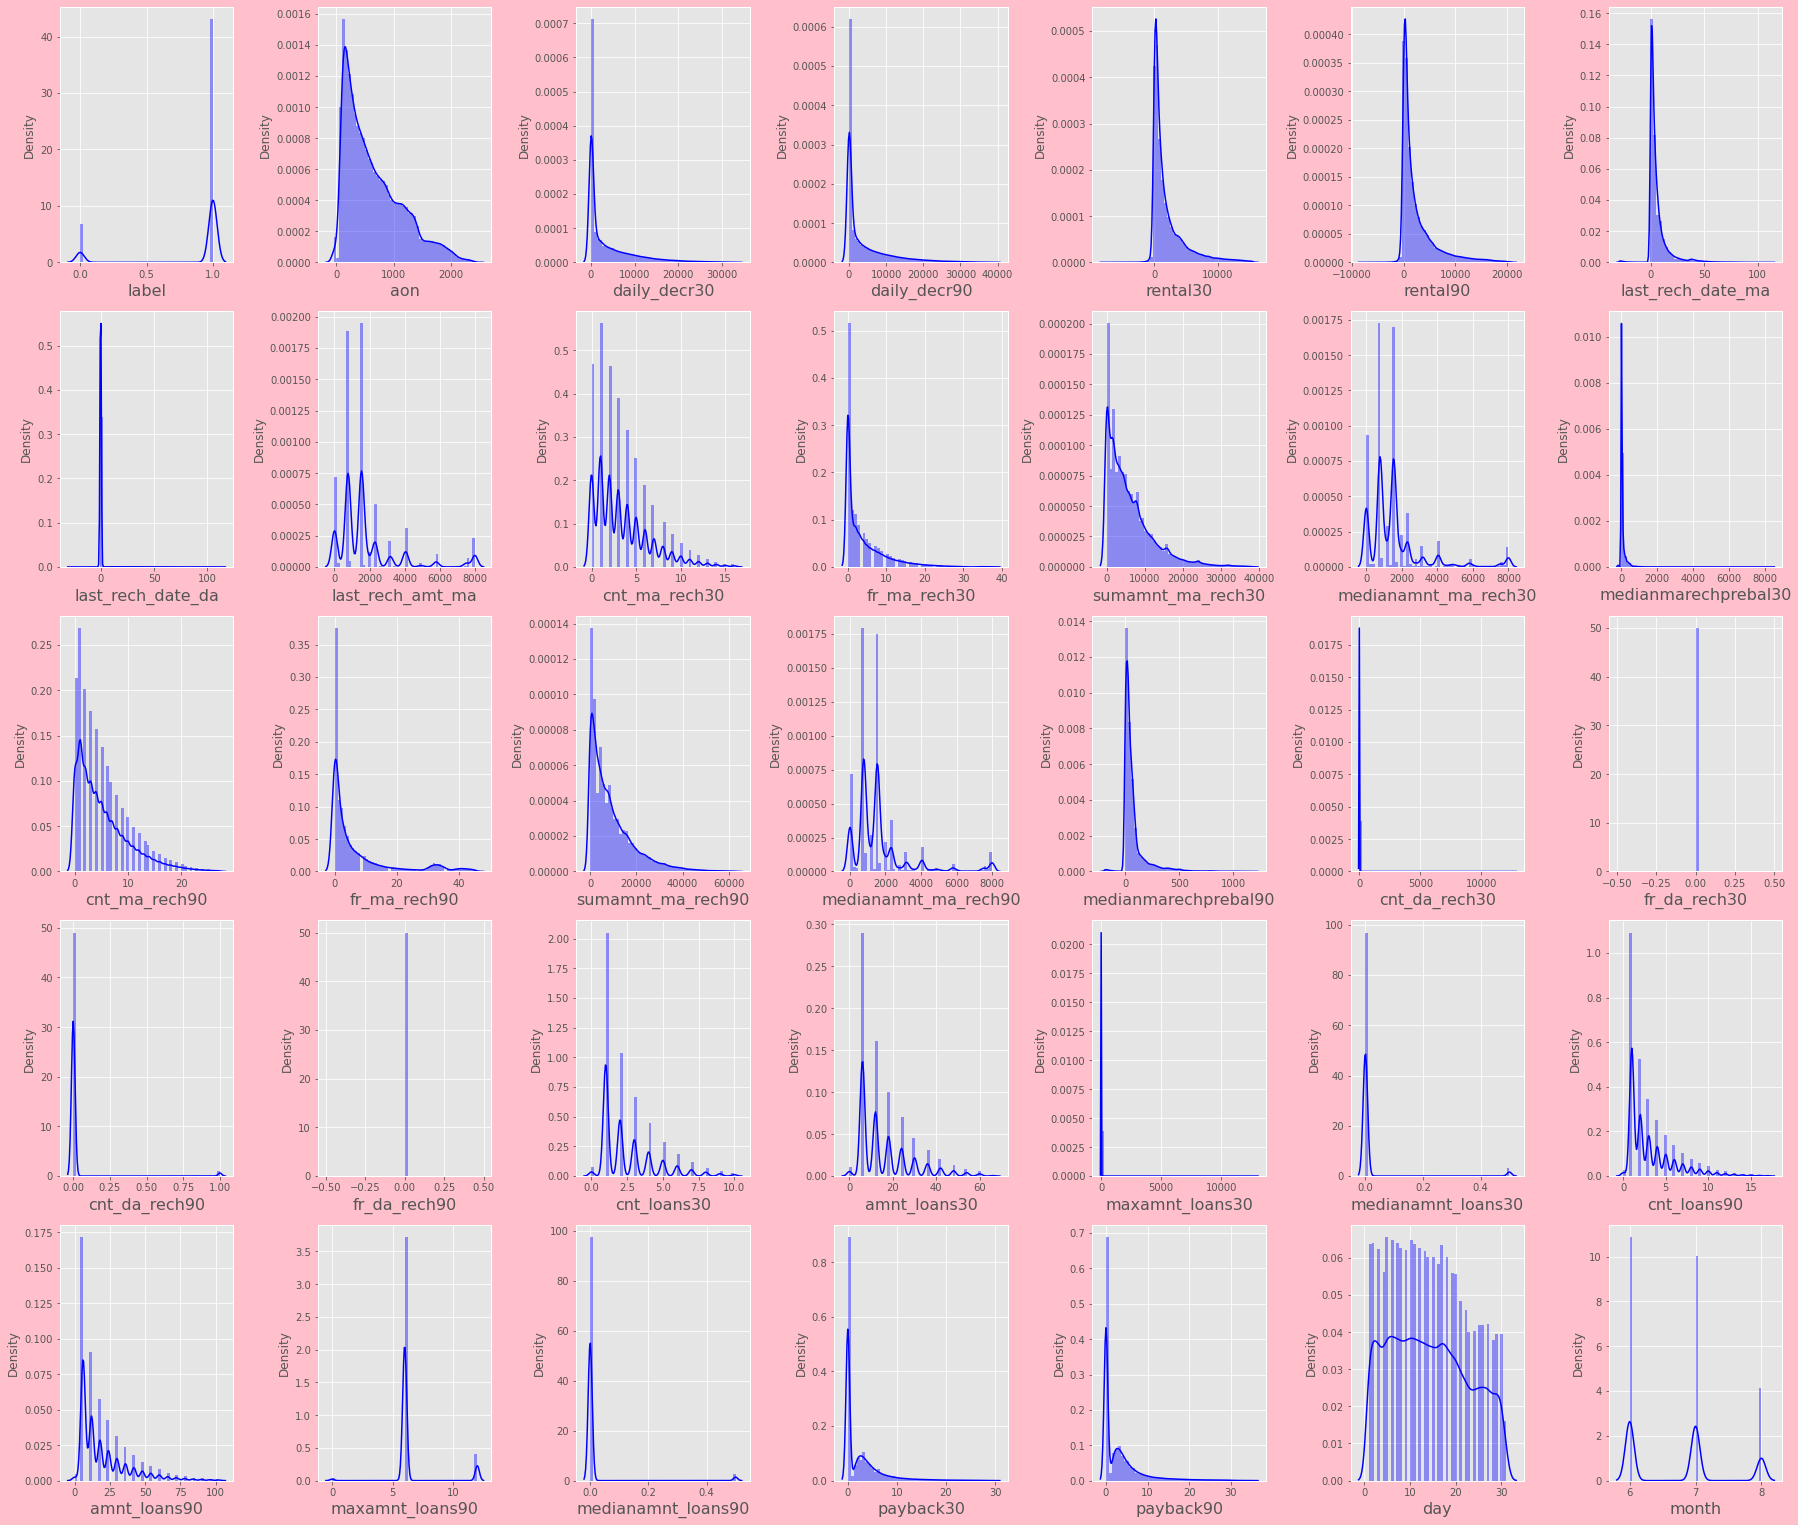

In [129]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 37:
        ax=plt.subplot(6,7,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


In [22]:
df.skew()

label                   -2.106401
aon                      0.959049
daily_decr30             1.953705
daily_decr90             2.065164
rental30                 2.184261
rental90                 2.232173
last_rech_date_ma        3.093122
last_rech_date_da       10.355319
last_rech_amt_ma         2.120011
cnt_ma_rech30            1.179682
fr_ma_rech30             2.003106
sumamnt_ma_rech30        1.635559
medianamnt_ma_rech30     2.323080
medianmarechprebal30    10.770289
cnt_ma_rech90            1.324178
fr_ma_rech90             1.982738
sumamnt_ma_rech90        1.707904
medianamnt_ma_rech90     2.366132
medianmarechprebal90     3.692764
cnt_da_rech30           51.004639
fr_da_rech30             0.000000
cnt_da_rech90            6.946350
fr_da_rech90             0.000000
cnt_loans30              1.452373
amnt_loans30             1.429796
maxamnt_loans30         53.726269
medianamnt_loans30       5.383719
cnt_loans90              1.704571
amnt_loans90             1.691292
maxamnt_loans9

In [23]:
## Lets separate target variable and features

X=df.drop('label',axis=1)
y=df.label

In [24]:
X.skew()


aon                      0.959049
daily_decr30             1.953705
daily_decr90             2.065164
rental30                 2.184261
rental90                 2.232173
last_rech_date_ma        3.093122
last_rech_date_da       10.355319
last_rech_amt_ma         2.120011
cnt_ma_rech30            1.179682
fr_ma_rech30             2.003106
sumamnt_ma_rech30        1.635559
medianamnt_ma_rech30     2.323080
medianmarechprebal30    10.770289
cnt_ma_rech90            1.324178
fr_ma_rech90             1.982738
sumamnt_ma_rech90        1.707904
medianamnt_ma_rech90     2.366132
medianmarechprebal90     3.692764
cnt_da_rech30           51.004639
fr_da_rech30             0.000000
cnt_da_rech90            6.946350
fr_da_rech90             0.000000
cnt_loans30              1.452373
amnt_loans30             1.429796
maxamnt_loans30         53.726269
medianamnt_loans30       5.383719
cnt_loans90              1.704571
amnt_loans90             1.691292
maxamnt_loans90          1.945506
medianamnt_loa

In [25]:
X.drop(columns=['fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

### Observation:- 

Based on skewness dropping certain columns

In [26]:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')
X=pd.DataFrame(x,columns=X.columns)

In [27]:
X.skew()

aon                      0.311403
daily_decr30            -1.907794
daily_decr90            -2.031647
rental30                 0.193840
rental90                 0.223198
last_rech_date_ma        0.113396
last_rech_date_da      -59.786483
last_rech_amt_ma        -0.183347
cnt_ma_rech30           -0.025989
fr_ma_rech30             0.139096
sumamnt_ma_rech30       -0.457997
medianamnt_ma_rech30    -0.314507
medianmarechprebal30     2.046658
cnt_ma_rech90           -0.029533
fr_ma_rech90             0.142130
sumamnt_ma_rech90       -0.363483
medianamnt_ma_rech90    -0.173482
medianmarechprebal90     0.997771
cnt_da_rech30            9.812822
cnt_da_rech90            6.946350
cnt_loans30              0.035895
amnt_loans30             0.009740
maxamnt_loans30         -0.311439
medianamnt_loans30       5.383719
cnt_loans90              0.086028
amnt_loans90            -0.000655
maxamnt_loans90          0.469600
medianamnt_loans90       6.130869
payback30                0.318530
payback90     

In [28]:
X.drop(columns=['medianamnt_loans90','medianamnt_loans30','cnt_da_rech90','cnt_da_rech30','medianmarechprebal30','last_rech_date_da','daily_decr90'],axis=1,inplace=True)

In [29]:
X.skew()

aon                     0.311403
daily_decr30           -1.907794
rental30                0.193840
rental90                0.223198
last_rech_date_ma       0.113396
last_rech_amt_ma       -0.183347
cnt_ma_rech30          -0.025989
fr_ma_rech30            0.139096
sumamnt_ma_rech30      -0.457997
medianamnt_ma_rech30   -0.314507
cnt_ma_rech90          -0.029533
fr_ma_rech90            0.142130
sumamnt_ma_rech90      -0.363483
medianamnt_ma_rech90   -0.173482
medianmarechprebal90    0.997771
cnt_loans30             0.035895
amnt_loans30            0.009740
maxamnt_loans30        -0.311439
cnt_loans90             0.086028
amnt_loans90           -0.000655
maxamnt_loans90         0.469600
payback30               0.318530
payback90               0.219141
day                    -0.156153
month                   0.121724
dtype: float64

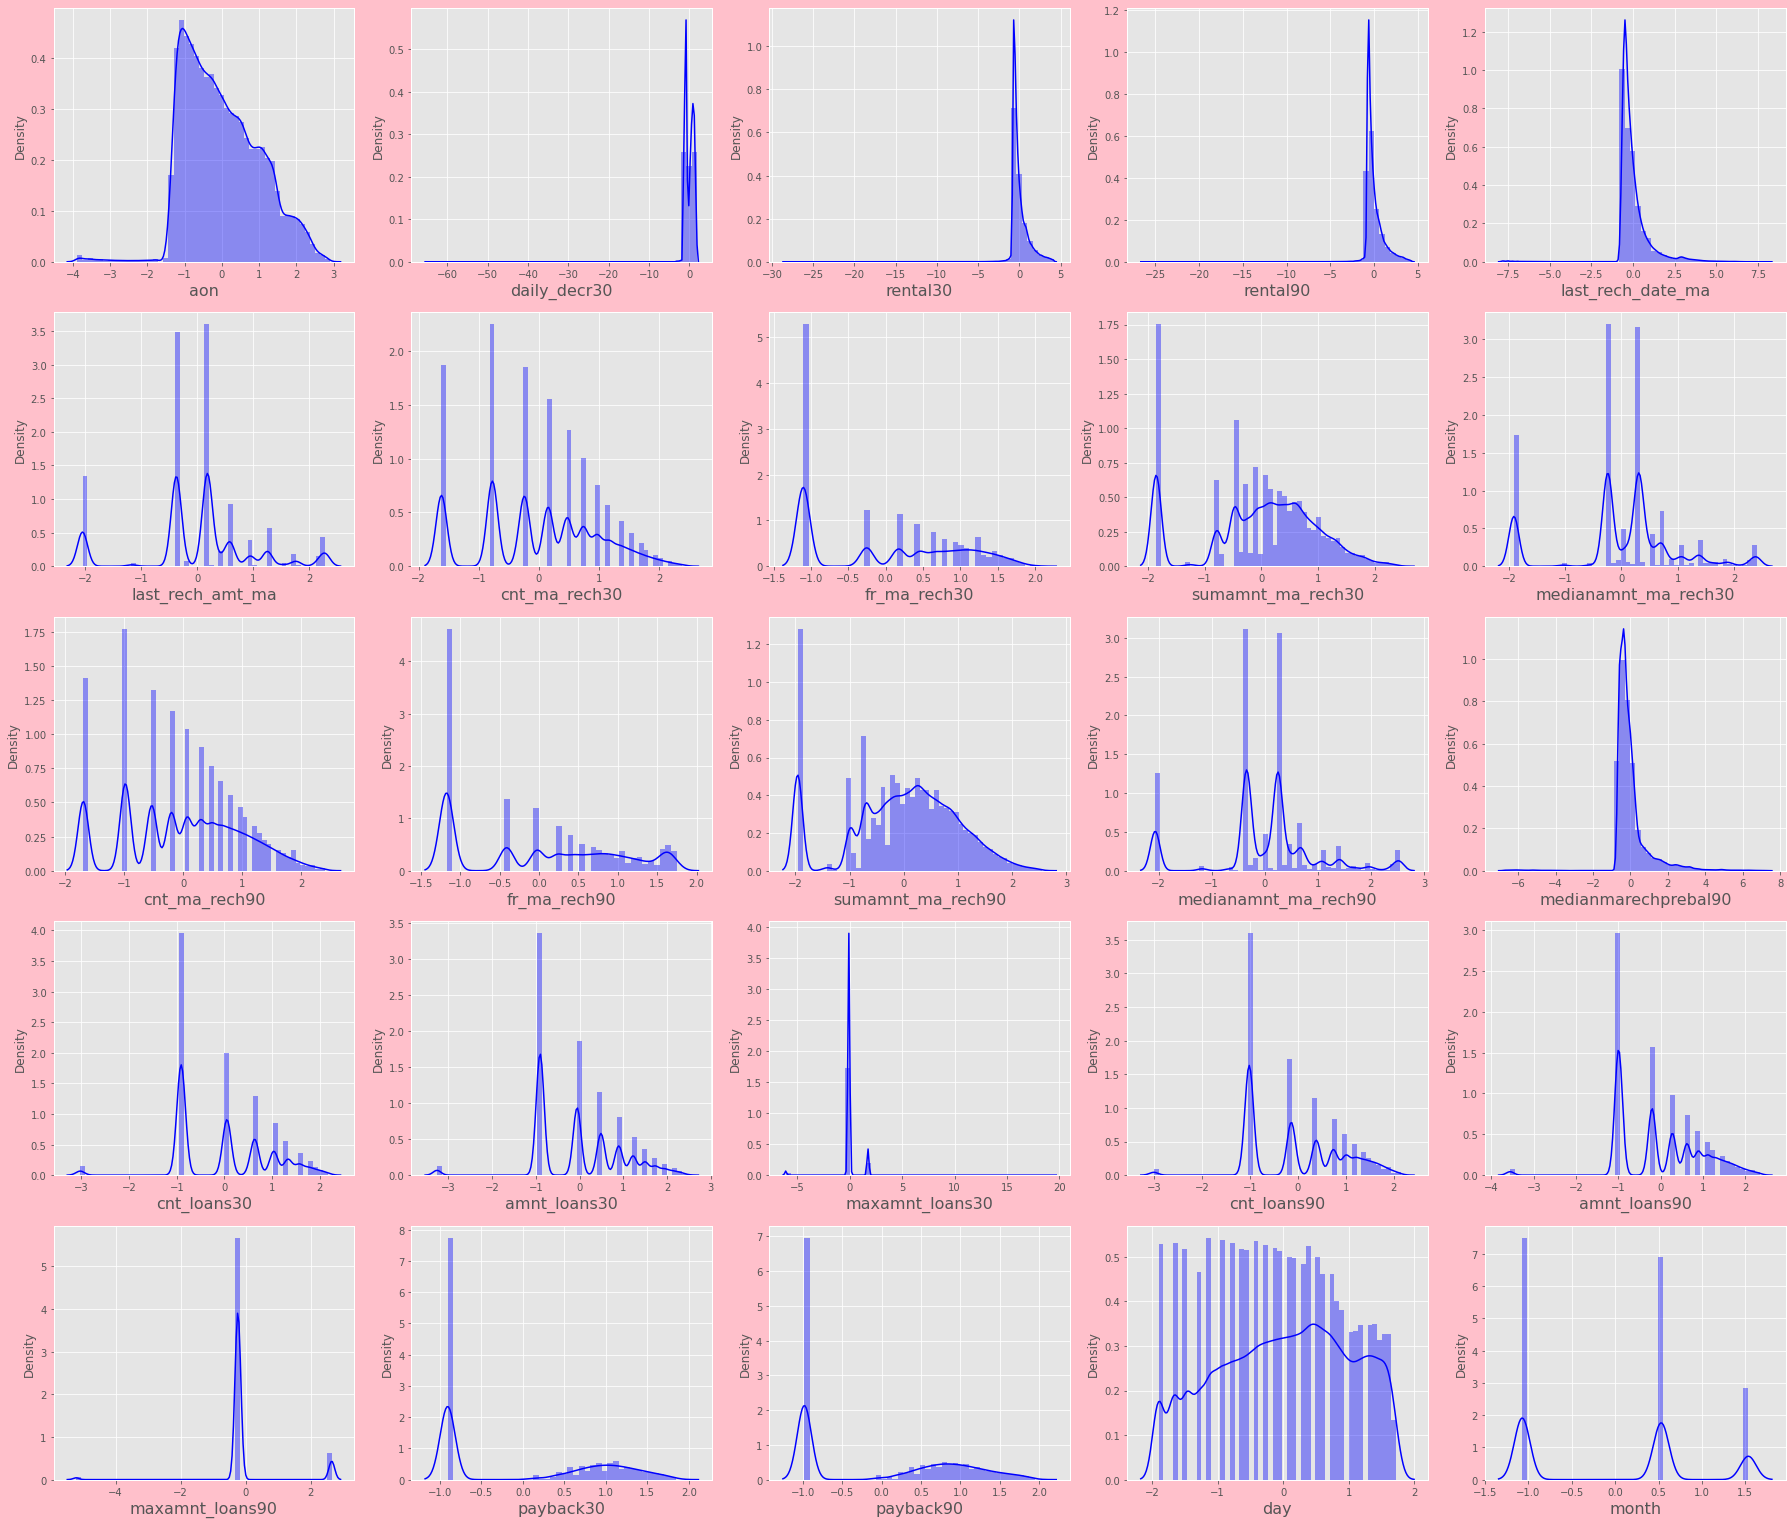

In [172]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in X:
    if plotnumber <= 30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(X[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


<AxesSubplot:title={'center':'Correlation with Target'}>

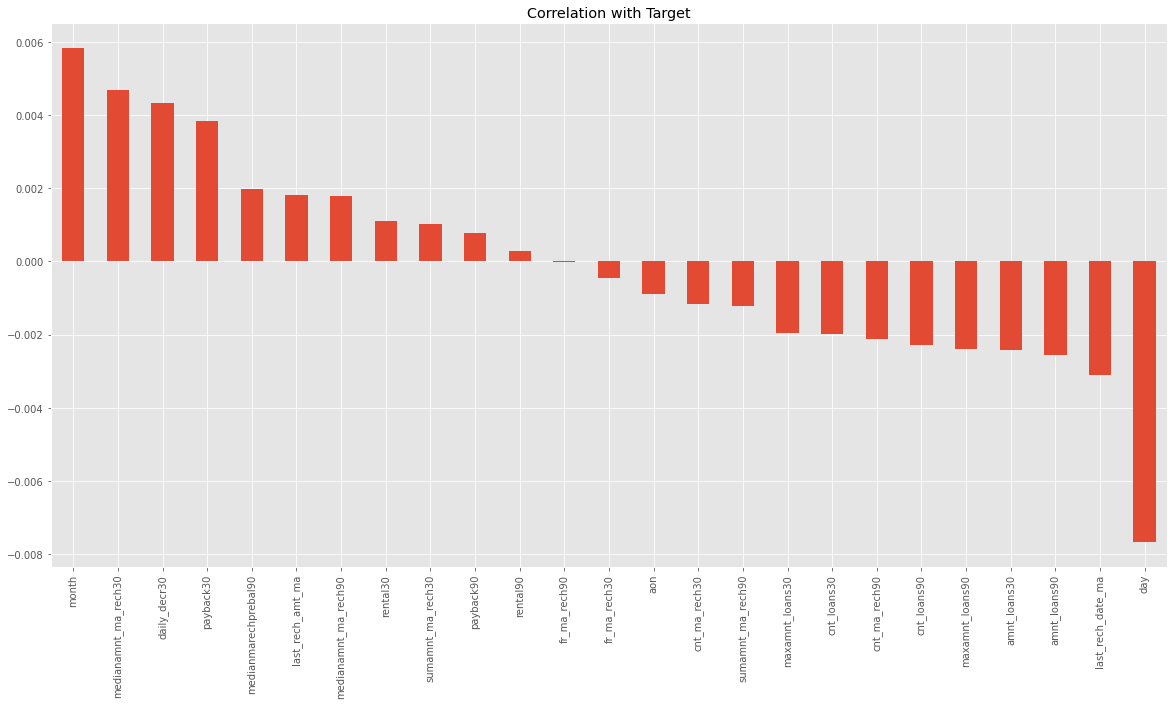

In [173]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


<AxesSubplot:xlabel='label', ylabel='count'>

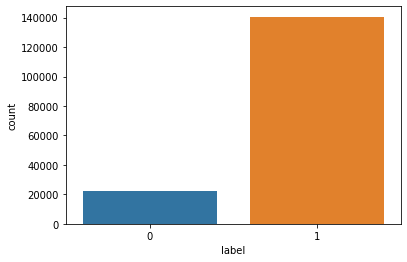

In [30]:
sns.countplot(y)

In [31]:
## Balancing the class
from imblearn.under_sampling import RandomUnderSampler


In [32]:
rs=RandomUnderSampler()
X,y=rs.fit_resample(X,y)

<AxesSubplot:xlabel='label', ylabel='count'>

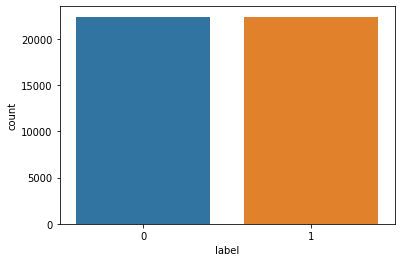

In [33]:
sns.countplot(y)

In [34]:
X.isna().sum()

aon                     0
daily_decr30            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
payback30               0
payback90               0
day                     0
month                   0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.032173,aon
1,7.217126,daily_decr30
2,18.421272,rental30
3,19.703584,rental90
4,2.241306,last_rech_date_ma
5,11.532718,last_rech_amt_ma
6,65.947793,cnt_ma_rech30
7,2.810173,fr_ma_rech30
8,121.795333,sumamnt_ma_rech30
9,28.137908,medianamnt_ma_rech30


### Observation:- we can deal with PCA this multicolinearity problem

In [37]:
from sklearn.decomposition import PCA
pca=PCA()


In [38]:
pca.fit_transform(x_scaled)


array([[ 2.45056218e+00, -3.59512253e-01,  1.21147780e+00, ...,
        -4.06224944e-03,  4.63257508e-03,  2.42829910e-02],
       [ 7.26830783e-03,  3.88963316e+00,  1.53028953e+00, ...,
        -2.73683879e-03, -2.18491840e-02,  1.15936832e-02],
       [-4.14871177e+00, -1.60629144e+00, -1.94113494e-01, ...,
        -2.71412486e-03, -1.49286851e-03, -3.51398570e-05],
       ...,
       [ 5.44820447e+00, -5.32440241e-02, -1.76215637e+00, ...,
         6.86352398e-02, -3.78500311e-02, -1.64323906e-01],
       [-3.79851598e+00,  7.02427543e+00,  1.03194775e+00, ...,
        -2.45459114e-01,  2.32999725e-01, -1.53305742e-01],
       [ 1.46458395e+00, -4.77629390e-01, -4.83768926e+00, ...,
        -1.83694980e-01, -7.20149336e-02, -2.37231665e-01]])

Text(0.5, 1.0, 'PCA')

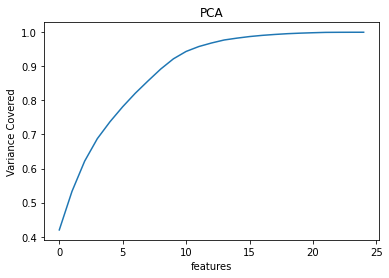

In [39]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('features')
plt.ylabel('Variance Covered')
plt.title('PCA')


### Observation:- Since 20 components gives maximum variance

In [40]:
pca=PCA(n_components=20)
pcomp=pca.fit_transform(x_scaled)
pc=pd.DataFrame(pcomp,columns=['PC'+str(i) for i in range(1,21)])


In [41]:
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,2.450562,-0.359512,1.211478,-1.242866,0.472474,0.748696,0.636423,-1.490047,-1.807762,0.044743,1.980458,0.589283,0.527066,0.352036,-0.344539,-0.151643,-0.039025,-0.158967,-0.006462,-0.045308
1,0.007268,3.889633,1.530290,1.782546,-1.013686,-0.652141,-2.182654,1.948041,-0.172983,-0.167232,0.943321,0.155312,0.196910,0.004176,0.015761,0.107447,-0.064764,-0.047833,-0.409561,0.147615
2,-4.148712,-1.606291,-0.194113,-0.124456,-1.153357,-0.140853,1.039108,0.471928,-0.186739,0.684314,0.103509,-0.032870,-0.026641,-0.043290,0.003458,-0.115216,-0.254541,0.057340,-0.001926,0.042950
3,-3.719108,-1.340000,-1.420423,-0.566531,1.643771,0.039965,1.665196,0.957931,0.470195,0.281575,0.030274,-0.172717,0.174887,0.120880,-0.199189,-0.108027,-0.285952,-0.003028,-0.021467,-0.002430
4,-5.320037,-1.607300,6.263973,1.723843,3.377771,-0.636716,1.865041,0.085086,-0.932080,3.826960,0.406966,0.144771,-0.060485,-0.069149,-0.027201,-0.237038,-0.703311,0.143230,-0.041774,0.057073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44795,6.479327,-2.865615,-3.066101,1.654428,0.175853,0.591093,-0.789050,-0.228249,-0.229699,0.428368,-0.871205,0.528328,-0.178627,-0.721886,0.380677,-0.091571,0.432383,0.429511,0.021759,-0.036736
44796,4.831010,-1.730089,-3.963411,1.971424,-0.587274,0.883253,-0.832156,-0.823812,-0.403313,-0.717605,1.149979,-0.365451,0.144378,-0.519337,-0.728062,-0.081244,0.492981,-0.205795,0.013945,0.044433
44797,5.448204,-0.053244,-1.762156,2.381037,-0.362952,0.820788,0.816491,-0.508317,-1.147698,-1.038247,1.275063,0.714556,0.222234,-0.954270,0.267451,-0.041678,0.031157,0.751529,-0.126191,0.064537
44798,-3.798516,7.024275,1.031948,-8.517134,1.511473,-0.219368,-0.886625,-0.060606,0.349020,1.781218,-0.069814,0.689094,-1.133080,0.397190,-0.465589,-0.845170,0.009394,0.295943,0.633316,1.017119


In [42]:
## Model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve


In [43]:
# Logistic Regression
lr=LogisticRegression()


In [189]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(pc,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    if round(accuracy_score(y_train,ypred)*100)==round(accuracy_score(y_test,y_pred)*100):
        print('At random state',i,'model performs well')
        print('At random state ',i)
        print(round(accuracy_score(y_test,y_pred)*100))


At random state 1 model performs well
At random state  1
77
At random state 2 model performs well
At random state  2
77
At random state 4 model performs well
At random state  4
77
At random state 8 model performs well
At random state  8
77
At random state 10 model performs well
At random state  10
77
At random state 17 model performs well
At random state  17
77
At random state 18 model performs well
At random state  18
77
At random state 20 model performs well
At random state  20
77
At random state 21 model performs well
At random state  21
77
At random state 24 model performs well
At random state  24
77
At random state 26 model performs well
At random state  26
77
At random state 28 model performs well
At random state  28
77
At random state 30 model performs well
At random state  30
77
At random state 31 model performs well
At random state  31
77
At random state 33 model performs well
At random state  33
77
At random state 34 model performs well
At random state  34
77
At random state 

At random state 274 model performs well
At random state  274
77
At random state 276 model performs well
At random state  276
77
At random state 277 model performs well
At random state  277
77
At random state 286 model performs well
At random state  286
77
At random state 291 model performs well
At random state  291
77
At random state 292 model performs well
At random state  292
77
At random state 293 model performs well
At random state  293
77
At random state 294 model performs well
At random state  294
77
At random state 295 model performs well
At random state  295
77
At random state 296 model performs well
At random state  296
77
At random state 299 model performs well
At random state  299
77
At random state 300 model performs well
At random state  300
77
At random state 302 model performs well
At random state  302
77
At random state 303 model performs well
At random state  303
77
At random state 304 model performs well
At random state  304
77
At random state 306 model performs well


At random state 541 model performs well
At random state  541
77
At random state 545 model performs well
At random state  545
77
At random state 548 model performs well
At random state  548
77
At random state 549 model performs well
At random state  549
77
At random state 560 model performs well
At random state  560
77
At random state 561 model performs well
At random state  561
77
At random state 564 model performs well
At random state  564
77
At random state 565 model performs well
At random state  565
77
At random state 569 model performs well
At random state  569
77
At random state 573 model performs well
At random state  573
77
At random state 576 model performs well
At random state  576
77
At random state 579 model performs well
At random state  579
77
At random state 580 model performs well
At random state  580
77
At random state 582 model performs well
At random state  582
77
At random state 585 model performs well
At random state  585
77
At random state 586 model performs well


At random state 849 model performs well
At random state  849
77
At random state 851 model performs well
At random state  851
77
At random state 852 model performs well
At random state  852
77
At random state 853 model performs well
At random state  853
77
At random state 855 model performs well
At random state  855
77
At random state 856 model performs well
At random state  856
77
At random state 857 model performs well
At random state  857
77
At random state 861 model performs well
At random state  861
77
At random state 862 model performs well
At random state  862
77
At random state 865 model performs well
At random state  865
77
At random state 866 model performs well
At random state  866
77
At random state 870 model performs well
At random state  870
77
At random state 874 model performs well
At random state  874
77
At random state 875 model performs well
At random state  875
77
At random state 879 model performs well
At random state  879
77
At random state 884 model performs well


<AxesSubplot:>

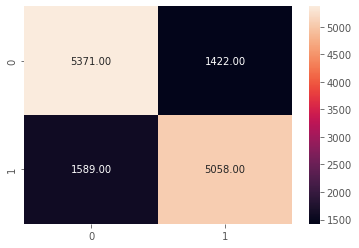

In [190]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')


In [191]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78      6793
           1       0.78      0.76      0.77      6647

    accuracy                           0.78     13440
   macro avg       0.78      0.78      0.78     13440
weighted avg       0.78      0.78      0.78     13440



In [44]:
from sklearn.model_selection import cross_val_score


In [193]:
cross_val_score(lr,pc,y,cv=5).mean()


0.7738616071428572

In [45]:
x_train,x_test,y_train,y_test=train_test_split(pc,y,test_size=0.30,random_state=152)


In [46]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print(accuracy_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print(accuracy_score(y_test,y_pred)*100)
        print(classification_report(y_test,y_pred))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')
        print('*'*100)
        print('cross_val_score',cross_val_score(clf,pc,y,cv=5).mean())
        


# KNN

In [53]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
model(knn,x_train,x_test,y_train,y_test,train=True)


In [ ]:
model(knn,x_train,x_test,y_train,y_test,train=False)


# Decision Tree


In [47]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
model(dt,x_train,x_test,y_train,y_test,train=True)


100.0


76.26488095238095
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6740
           1       0.76      0.76      0.76      6700

    accuracy                           0.76     13440
   macro avg       0.76      0.76      0.76     13440
weighted avg       0.76      0.76      0.76     13440

****************************************************************************************************
cross_val_score 0.7684375


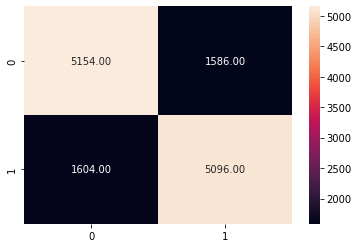

In [49]:
model(dt,x_train,x_test,y_train,y_test,train=False)


# Random Forest


In [50]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [53]:
model(rf,x_train,x_test,y_train,y_test,train=True)


99.9968112244898


83.40773809523809
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      6740
           1       0.81      0.87      0.84      6700

    accuracy                           0.83     13440
   macro avg       0.84      0.83      0.83     13440
weighted avg       0.84      0.83      0.83     13440

****************************************************************************************************
cross_val_score 0.8373437499999999


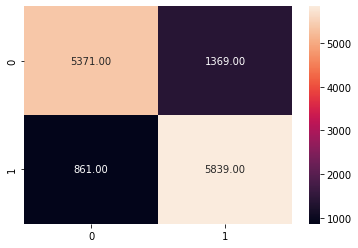

In [54]:
model(rf,x_train,x_test,y_train,y_test,train=False)


# Bagging Classifier


In [55]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)


BaggingClassifier()

In [56]:
model(bg,x_train,x_test,y_train,y_test,train=True)


98.98278061224491


82.24702380952381
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6740
           1       0.83      0.82      0.82      6700

    accuracy                           0.82     13440
   macro avg       0.82      0.82      0.82     13440
weighted avg       0.82      0.82      0.82     13440

****************************************************************************************************
cross_val_score 0.8229241071428571


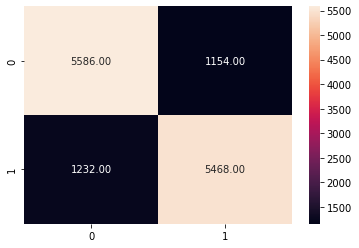

In [57]:
model(bg,x_train,x_test,y_train,y_test,train=False)


 # GradientBoosting Classifier


In [58]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)


GradientBoostingClassifier()

In [59]:
model(gb,x_train,x_test,y_train,y_test,train=True)


83.21428571428572


81.81547619047619
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      6740
           1       0.80      0.84      0.82      6700

    accuracy                           0.82     13440
   macro avg       0.82      0.82      0.82     13440
weighted avg       0.82      0.82      0.82     13440

****************************************************************************************************
cross_val_score 0.8201116071428572


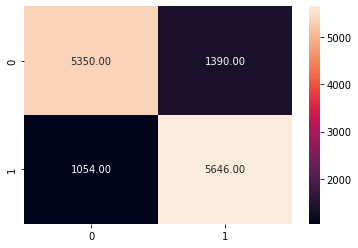

In [60]:
model(gb,x_train,x_test,y_train,y_test,train=False)


In [61]:
y_pred=rf.predict(x_test)


In [62]:
Pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [63]:
Pred

,Actual,Predicted
29447,1,1
43869,1,1
38851,1,1
37643,1,1
34423,1,0
...,...,...
25941,1,1
34051,1,1
5275,0,0
12170,0,0


Text(0.5, 1.0, 'Actual vs Predicted')

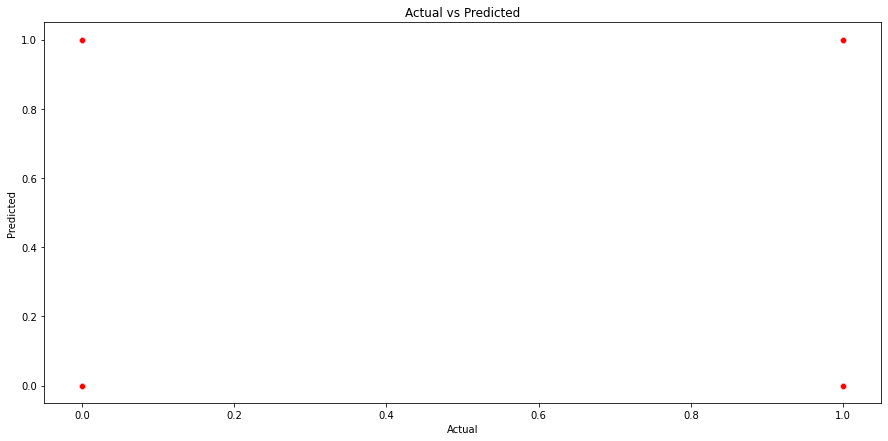

In [64]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


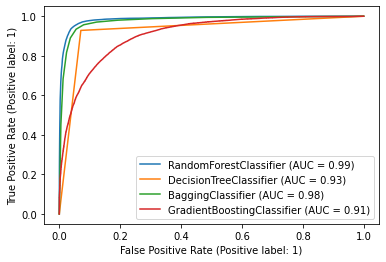

In [65]:
disp=plot_roc_curve(rf,pc,y)

plot_roc_curve(dt,pc,y,ax=disp.ax_)
plot_roc_curve(bg,pc,y,ax=disp.ax_)
plot_roc_curve(gb,pc,y,ax=disp.ax_)


In [66]:
# Saving the model
import pickle
filename='Insurance_Fraud'
pickle.dump(rf,open(filename,'wb'))


# Final Conclusion:- Random Forest is best performing model with Accuracy_score=Cross_val_score=F1 Score=83%
